# Matemática Computacional - Trabalho 1

## Equipe:
* Henricky de  Lima Monteiro - 475075
* João Almir da Costa Junior - 470034


In [1]:
#base imports
import numpy as np
import matplotlib.pyplot as plt

#convergencia diagonal dominante ou convergencia de linhas

------------------------
### Q1) Implementar:
#### a) Eliminação de Gauss

Inicialmente vamos escrever a substituição retroativa para testar o método de Gauss.

In [2]:
# Substituição Retroativa
"""
A - matriz extendida
nEq - ordem da matriz
nL - num linhas
nC - num colunas
x - solução
"""
def sretro(A):
    nC = len(A[0])
    nEq = nC-1
    b = [row[nC-1] for row in A]
    x = np.zeros(nEq)
    for i in range(nEq,0,-1):
        I = i-1
        x[I]=b[I]
        sumRes = 0
        #aux = "x[{0}] = b[{0}] - (".format(I)
        for j in range(i,nEq):
         #   aux += "A[{0}][{1}]*x[{1}]".format(I,j)
            sumRes = sumRes + A[I][j]*x[j]
        #aux += ') / A[{0}][{0}]'.format(I)
        #print(aux)
        if(A[I][I] != 0):
            x[I] = (x[I]-sumRes)/A[I][I]
        elif(x[I]-sumRes != 0):
            raise Exception("Impossible system")
        else:
            raise Exception("Indeterminate system")
    return x

Agora vamos implementar a eliminação de gauss da forma simples, sem pivoteamento.

In [3]:

"""
A - matriz extendida
nEq - ordem da matriz
nL - num linhas
nC - num colunas
x - solução
"""
def gauss(M):
    A = M.copy()
    nL= len(A)
    nC = len(A[0])
    nEq = nC-1
    posPivo=0
    for i in range(0,nEq-1):
        pivo = A[i][i]
        posPivo=i
        # calc multiples
        m = np.zeros(nL)
        for k in range(i+1,nL):
#            print('m[{0}] = - A[{0}][{1}]/A[{0}][{0}]'.format(k,0),"= -{0}/{1}".format(A[k][0],pivo))
            m[k] = - A[k][posPivo]/pivo
        # Operações
        for j in range(posPivo+1,nL):
            #print('L({0})={1}, m({0})={2}'.format(j,A[j],m[j]))
            A[j] = m[j]*A[posPivo]+A[j]
    return A

#### b) Métodos de Jacobi e Gauss-Seidel

In [4]:
def ajustePivoteamento(A):
    for i in range(len(A)):
        pivo = A[i][i]
        col = [row[i] for row in A]
        if( pivo < 1 and pivo >-1):
            indexMax = col.index(max(col))
            A[[i,indexMax]] = A[[indexMax,i]]
    return A
    
A = np.array([[0,2,3],[4,0.1,6],[7,8,-0.9]])
print(A)
res=ajustePivoteamento(A)
print(res)


[[ 0.   2.   3. ]
 [ 4.   0.1  6. ]
 [ 7.   8.  -0.9]]
[[ 4.   0.1  6. ]
 [ 7.   8.  -0.9]
 [ 0.   2.   3. ]]


##### b.1) Método de Jacobi

Para este método, foi necessário criar uma função ```EqGeral``` que cria uma matriz com os operadores para a equação geral que nos leva para o proximo passo da interação.

In [5]:
# Método de Jacobi
"""
A - matriz extendida
nEq - ordem da matriz
nL - num linhas
nC - num colunas
x - solução
"""
def EqGeral(A):
    nL= len(A)
    nC = len(A[0])
    eG = []
    
    for i in range(nL):
        aux = []
        for j in range(nC):
            if(i==j):
                aux.append(None)         
            elif(j == nC-1):
                continue
            else:
                aux.append(A[i][j]*-1)    
        eG.append(aux.copy())
        aux.clear()

    return np.array(eG)

def Jacobi(A,E,maxK=15, isX0Zeros=False,withLogs=False):
    nL= len(A)
    nC = len(A[0])
    k=0
    #get b's - independentes
    b = [row[nC-1] for row in A]
    #divisores
    div = A.diagonal()
    #definindo x0 - solução
    Xa = np.zeros(nC-1) #X_anterior - X0
    #define a solução
    X = np.zeros(nC-1) 
    if(not isX0Zeros):
        for i in range(len(Xa)):
            Xa[i]= b[i]/div[i]

    #pega a equação geral
    EG = EqGeral(A)
    #Aplicando
    if(withLogs):
        print('#','X:',X,max(X-Xa),'\nXa=',Xa, 'k=',k)
    k=k+1
    for i in range(nL):
        soma = b[i]
        for j in range(nC-1):
            termo = EG[i][j]
            if(termo != None):
                xj = Xa[j]
                soma += xj*termo
        X[i] = soma/div[i]

    Varify = abs(max(abs(X)-abs(Xa)))
    while( k < maxK and Varify > E ):
        k=k+1
        Xa = X.copy()
        X = np.zeros(nC-1) 
        for i in range(nL):
            soma = b[i]
            for j in range(nC-1):
                termo = EG[i][j]
                if(termo != None):
                    xj = Xa[j]
                    soma += xj*termo
            X[i] = soma/div[i]
        if(withLogs):
            print('>>X=',X, 'k=',k, 'E=',Varify)
        Varify = abs(max(abs(X)-abs(Xa)))

    if(withLogs):
        print('--------\nE:',max(X-Xa))
        print('X',X, 'k: ', k)
        print('\n\n\n')
    
    return X,k

Jacobi(np.loadtxt("ex_jacobi.txt"),0.001, maxK=10, isX0Zeros=True)
Jacobi(np.loadtxt("exVideo.txt"),0.05)


(array([ 0.9994, -1.9888,  0.9984]), 3)

##### b.2) Método de Gauss-Seidel


In [6]:
def GaussSeidel(A,E,maxK=15,withLogs=False):
    nL= len(A)
    nC = len(A[0])
    k=0
    #get b's - independentes
    b = [row[nC-1] for row in A]
    #divisores
    div = A.diagonal()
    #definindo x0 - solução
    Xa = np.zeros(nC-1) #X_anterior - X0
    #define a solução
    X = np.zeros(nC-1) 
    # if(not isX0Zeros):
    #     for i in range(len(Xa)):
    #         Xa[i]= b[i]/div[i]

    #pega a equação geral
    EG = EqGeral(A)
    #Aplicando
    if(withLogs):
        print('#','X:',X,max(X-Xa),'\nXa=',Xa, 'k=',k)
    k=k+1
    for i in range(nL):
        soma = b[i]
        for j in range(nC-1):
            termo = EG[i][j]
            if(termo != None):
                xj = X[j]
                soma += xj*termo
        X[i] = soma/div[i]

    # print('X',X)
    Varify = abs(max(abs(X)-abs(Xa)))
    while( k < maxK and Varify > E ):
        k=k+1
        Xa = X.copy()
        # X = np.zeros(nC-1) 
        for i in range(nL):
            soma = b[i]
            for j in range(nC-1):
                termo = EG[i][j]
                if(termo != None):
                    xj = X[j]
                    soma += xj*termo
            X[i] = soma/div[i]
        if(withLogs):
            print('>>X=',X, 'k=',k, 'E=',Varify)
        Varify = abs(max(abs(X)-abs(Xa)))

    if(withLogs):
        print('--------\nE:',max(X-Xa))
        print('X',X, 'k: ', k)
        print('\n\n\n')
    
    return X,k

GaussSeidel(np.loadtxt("ex_jacobi.txt"),0.001, maxK=10)
GaussSeidel(np.loadtxt("exVideo.txt"),0.05)

(array([ 0.9966772 , -2.00052504,  1.00082207]), 3)

----------
### 2) Comparar soluções: ($\varepsilon=0.0001$)
#### a)

$$
   \left (\begin{array}{cccc} 
    10 &1 &1 &12\\
    1 &10 &1 &12\\
    1 &1 &10 &12
    \end{array}\right)
$$

> Vamos definir algumas funções de chamada para os métodos recebendo a matriz de entrada.

In [7]:
def CallGauss(A):
    print("Gauss -----------")
    M = gauss(A) #gauss vai transformar em triangular
    X = sretro(M) #substituição

    print(X)

#jacobi
def CallJacobi(A,E):
    print("Jacobi -----------")
    X,iter = Jacobi(A,E) #gauss vai transformar em triangular
    print('X:',X,'iter=',iter)
#Gaus-Seidel
def CallGaussSeidel(A,E):
    print("Gauss-Seidel -----------")
    X,iter = GaussSeidel(A,E) #gauss vai transformar em triangular
    print('X:',X,'iter=',iter)

In [8]:
E = 0.0001
A = np.loadtxt('Q2_a.txt')

print(A)
#call function
CallGauss(A)
CallJacobi(A,E)
CallGaussSeidel(A,E)

[[10.  1.  1. 12.]
 [ 1. 10.  1. 12.]
 [ 1.  1. 10. 12.]]
Gauss -----------
[1. 1. 1.]
Jacobi -----------
X: [1.0000128 1.0000128 1.0000128] iter= 6
Gauss-Seidel -----------
X: [1.00000021 0.9999999  0.99999999] iter= 5


#### b)

$$
   \left (\begin{array}{ccccc} 
    4 &−1 &0& 0 &1\\
    −1 &4 &−1& 0& 1\\
    0& −1 &4 &−1& 1\\
    0 &0& −1 &4 &1

    \end{array}\right)
$$

In [9]:
E = 0.0001
A = np.loadtxt('Q2_b.txt')

print(A)
#call function
CallGauss(A)
CallJacobi(A,E)
CallGaussSeidel(A,E)

[[ 4. -1.  0.  0.  1.]
 [-1.  4. -1.  0.  1.]
 [ 0. -1.  4. -1.  1.]
 [ 0.  0. -1.  4.  1.]]
Gauss -----------
[0.36363636 0.45454545 0.45454545 0.36363636]
Jacobi -----------
X: [0.36360073 0.4544878  0.4544878  0.36360073] iter= 9
Gauss-Seidel -----------
X: [0.36362858 0.45454036 0.45454339 0.36363585] iter= 7


#### c)

$$
   \left (\begin{array}{cccc} 
    10 &1 &−1& 10\\
    2 &10 &8 &20\\
    7 &1 &10 &30
    \end{array}\right)
$$

In [10]:
E = 0.0001
A = np.loadtxt('Q2_c.txt')

print(A)
#call function
CallGauss(A)
CallJacobi(A,E)
CallGaussSeidel(A,E)

[[10.  1. -1. 10.]
 [ 2. 10.  8. 20.]
 [ 7.  1. 10. 30.]]
Gauss -----------
[1.2109375 0.0390625 2.1484375]
Jacobi -----------
X: [1.2109291  0.03901459 2.14840151] iter= 11
Gauss-Seidel -----------
X: [1.21093949 0.03907669 2.14843469] iter= 9


#### d)

$$
   \left (\begin{array}{cccc} 
    5 &1 &1 &5\\
    3 &4 &1 &6\\
    3 &3 &6 &0
    \end{array}\right)
$$

In [11]:
E = 0.0001
A = np.loadtxt('Q2_d.txt')

print(A)
#call function
CallGauss(A)
CallJacobi(A,E)
CallGaussSeidel(A,E)

[[5. 1. 1. 5.]
 [3. 4. 1. 6.]
 [3. 3. 6. 0.]]
Gauss -----------
[ 1.  1. -1.]
Jacobi -----------
X: [ 0.99815543  0.9968596  -1.00347492] iter= 15
Gauss-Seidel -----------
X: [ 1.00000731  0.99999772 -1.00000252] iter= 7


--------------
### 3) Implementar

#### a) Método da bisecção

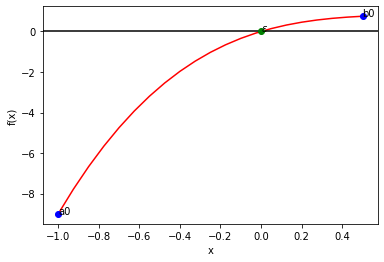

iter 10
a -0.0009765625
b 0.00048828125
xk: -0.000244140625
fxk -0.000732660322682932
dif 0.00146484375 



In [12]:
def biseccao(a,b,F,E,withGraph=True):
    
    aa = a 
    bb = b #usados para recuperar o a e b antigos na ultima iteração

    #grafico
    if(withGraph):
        step = abs(b-a)*0.05
        x = np.arange(aa,bb+step,step)
        y= F(x)
        plt.xlabel('x')
        plt.ylabel('f(x)')

        plt.plot(x,y,'-r')
        #dots
        plt.plot(aa,F(aa),'ob')
        plt.text(aa,F(aa),"a0")

        plt.plot(bb,F(bb),'ob')
        plt.text(bb,F(bb),'b0')

        plt.axhline(y=0, color='k')

    xk = 0 #media entre a e b
    fxk = 0 #função com xk como entrada
    dif = 0 #diferenca entre a e b
    iter = 0 #qtd de iteracoes

    xk = (a+b)/2
    fxk= F(xk)
    dif = abs(a-b) 


    if((xk+b)/2)*fxk < 0:
        a = xk
    else:
        b = xk
    

    while(abs(fxk) > E and dif > E ):
        aa = a
        bb = b

        iter = iter + 1        
        xk = (a+b)/2
        fxk= F(xk)
        dif = abs(a-b) 

        

        if((xk+b)/2)*fxk < 0:
            a = xk
        else:
            b = xk

    if(withGraph):
        plt.plot(xk,fxk,'og')
        plt.text(xk,fxk,r'$\varepsilon$')
        plt.show()
    print("iter", iter)
    print("a", aa)
    print("b", bb)        
    print("xk:", xk)
    print("fxk", fxk)
    print("dif", dif,"\n")    
    
biseccao(-1,0.5,lambda x:2*x**3 -4*x**2 + 3*x,0.001) 

#### b) Método da posição falsa

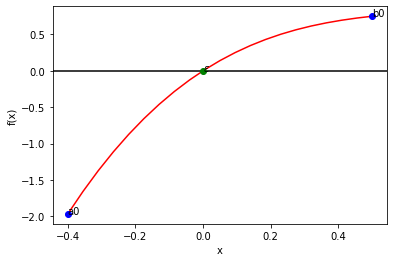

iter 8
a0: -0.4 , b0:  0.5
a: -0.4 , b:  0.0001726301112925558
xk: 0.0001726301112925558
fxk 0.0005177711395455214
dif 0.40044225532463235 



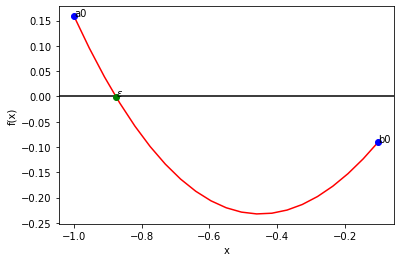

iter 4
a0: -1 , b0:  -0.1
a: -1 , b:  -0.8764230304582485
xk: -0.8764230304582485
fxk -0.0003375545196749874
dif 0.1255326637361358 



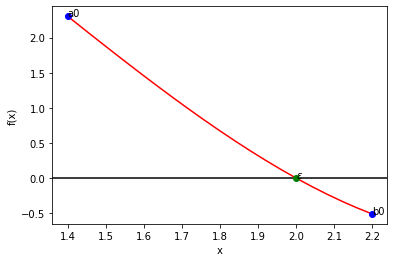

iter 2
a0: 1.4 , b0:  2.2
a: 2.000386940580091 , b:  1.9899077590884418
xk: 2.000386940580091
fxk -0.0011605222363151313
dif 0.06463769545701292 



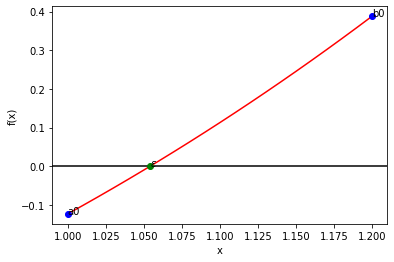

iter 4
a0: 1 , b0:  1.2
a: 1.0541263408994006 , b:  1.2
xk: 1.0541263408994006
fxk -1.8604573073233155e-06
dif 0.14588018926309387 



In [13]:
def falsePosition(a,b,f,E, withGraph=True):
    #valores iniciais
    a0 = a
    b0 = b

    #grafico
    if(withGraph):
        step = abs(b-a)*0.05
        x = np.arange(a0,b0+step,step)
        y= f(x)
        plt.xlabel('x')
        plt.ylabel('f(x)')

        plt.plot(x,y,'-r')
        #dots
        plt.plot(a0,f(a0),'ob')
        plt.text(a0,f(a0),"a0")

        plt.plot(b0,f(b0),'ob')
        plt.text(b0,f(b0),'b0')

        plt.axhline(y=0, color='k')




    xk = 0 #ponto falso
    fxk = 0 #função com xk como entrada
    dif = 0 #diferenca entre a e b
    iter = 0 #qtd de iteracoes

    #verificação f(a0)*f(b0) < 0
    if(f(a0)*f(b0)>=0):
        print('impossível')
        return



    #usar uma função lambda para achar o novo valor apartir de A e B passados
    getXk = lambda x,y: (x*f(y)-y*f(x))/(f(y)-f(x))
    xk = getXk(a,b)
    fxk= f(xk)
    dif = abs(b-a) 

    #definindo o intervalo de verificação
    if(xk*fxk < 0): #está do lado direito?
        a = xk
    else:
        b = xk
        
        

    while(abs(fxk) > E and abs(dif) > E and iter < 50 ):
        iter = iter + 1        
        xk = getXk(a,b)
        fxk= f(xk)
        dif = abs(b-a)

        if(xk*fxk < 0): #está do lado direito?
            a = xk
        else:
            b = xk
            
    if(withGraph):
        plt.plot(xk,fxk,'og')
        plt.text(xk,fxk,r'$\varepsilon$')
        plt.show()
    print("iter", iter)
    print("a0:", a0,", b0: ", b0)
    print("a:", a,", b: ", b)
    print("xk:", xk)
    print("fxk", fxk)
    print("dif", dif,"\n")


falsePosition(-0.4,0.5,lambda x: 2*x**3 -4*x**2+3*x , 0.001)
falsePosition(-1,-0.1,lambda x: np.sin(x)+x**2 , 0.001)

falsePosition(1.4,2.2,lambda x: x**3 -4*x**2 + x+6 , 0.01)
falsePosition(1,1.2,lambda x: np.exp(x)-np.sin(x)-2 , 0.00001)



#### c) Método do Pegaso

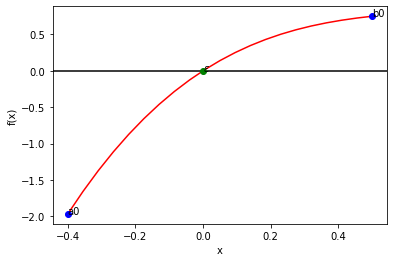

iter 8
a0: -0.4 , b0:  0.5
a: -0.4 , b:  0.0001726301112925558
xk: 0.0001726301112925558
fxk 0.0005177711395455214
dif 0.40044225532463235 



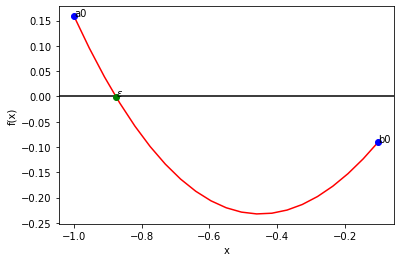

iter 4
a0: -1 , b0:  -0.1
a: -1 , b:  -0.8764230304582485
xk: -0.8764230304582485
fxk -0.0003375545196749874
dif 0.1255326637361358 



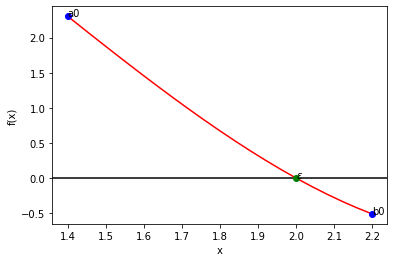

iter 2
a0: 1.4 , b0:  2.2
a: 2.000386940580091 , b:  1.9899077590884418
xk: 2.000386940580091
fxk -0.0011605222363151313
dif 0.06463769545701292 



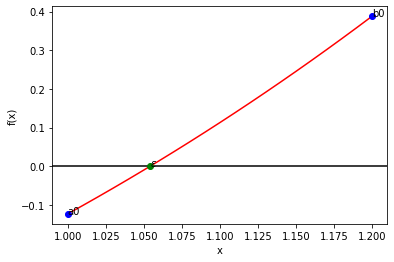

iter 4
a0: 1 , b0:  1.2
a: 1.0541263408994006 , b:  1.2
xk: 1.0541263408994006
fxk -1.8604573073233155e-06
dif 0.14588018926309387 



In [14]:
def Pegaso(a,b,f,E, withGraph=True):
    #valores iniciais
    a0 = a
    b0 = b

    #grafico
    if(withGraph):
        step = abs(b-a)*0.05
        x = np.arange(a0,b0+step,step)
        y= f(x)
        plt.xlabel('x')
        plt.ylabel('f(x)')

        plt.plot(x,y,'-r')
        #dots
        plt.plot(a0,f(a0),'ob')
        plt.text(a0,f(a0),"a0")

        plt.plot(b0,f(b0),'ob')
        plt.text(b0,f(b0),'b0')

        plt.axhline(y=0, color='k')




    xk = 0 #ponto falso
    fxk = 0 #função com xk como entrada
    dif = 0 #diferenca entre a e b
    iter = 0 #qtd de iteracoes

    #verificação f(a0)*f(b0) < 0
    if(f(a0)*f(b0)>=0):
        print('impossível')
        return



    #usar uma função lambda para achar o novo valor apartir de A e B passados
    getXk = lambda x,y: y - (f(y)*(y-x))/(f(y)-f(x))
    xk = getXk(a,b)
    fxk= f(xk)
    dif = abs(b-a) 

    #definindo o intervalo de verificação
    if(f(b)*fxk < 0): #está do lado direito?
        a = xk
    else:
        b = xk
        
        

    while(abs(fxk) > E and abs(dif) > E and iter < 50 ):
        iter = iter + 1        
        xk = getXk(a,b)
        fxk= f(xk)
        dif = abs(b-a)

        if(xk*fxk < 0): #está do lado direito?
            a = xk
        else:
            b = xk
            
    if(withGraph):
        plt.plot(xk,fxk,'og')
        plt.text(xk,fxk,r'$\varepsilon$')
        plt.show()
    print("iter", iter)
    print("a0:", a0,", b0: ", b0)
    print("a:", a,", b: ", b)
    print("xk:", xk)
    print("fxk", fxk)
    print("dif", dif,"\n")


falsePosition(-0.4,0.5,lambda x: 2*x**3 -4*x**2+3*x , 0.001)
falsePosition(-1,-0.1,lambda x: np.sin(x)+x**2 , 0.001)

falsePosition(1.4,2.2,lambda x: x**3 -4*x**2 + x+6 , 0.01)
falsePosition(1,1.2,lambda x: np.exp(x)-np.sin(x)-2 , 0.00001)



------------------
### 4) Comparar

> Vamos definir algumas funções de chamada para os métodos recebendo a matriz de entrada.

In [15]:
def CallBiseccao(a,b,f,E):
    print("Bisecção -----------")
    biseccao(a,b,f,E) 

def CallfalsePosition(a,b,f,E):
    print("Posição Falsa -----------")
    falsePosition(a,b,f,E)

a=0.1
b=1

#### a) com $\epsilon = 2^{-5}$
$$f(x) = x^5 - 3x^4 - 3x^2 + 2$$ 



Bisecção -----------


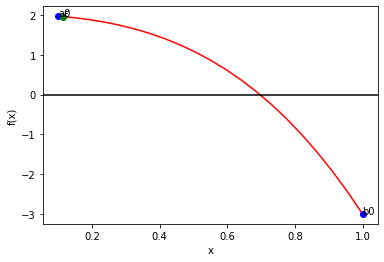

iter 5
a 0.1
b 0.128125
xk: 0.1140625
fxk 1.9604807451448683
dif 0.028124999999999983 

Posição Falsa -----------


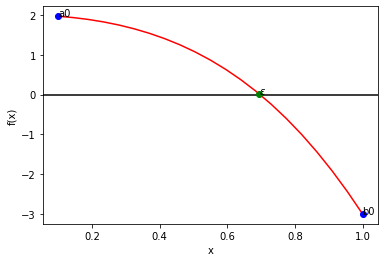

iter 6
a0: 0.1 , b0:  1
a: 1.0950484250558883 , b:  0.6952718464418861
xk: 0.6952718464418861
fxk 0.011225984731430216
dif 0.40270350005256983 



In [16]:
f = lambda x: x**5 - 3*x**4 - 3*x**2 + 2
E = 0.03125
CallBiseccao(a,b,f,E)
CallfalsePosition(a,b,f,E)

#### b) com $\epsilon = 10^{-3}$
$$f(x) = \sqrt{x} - 5^{-x}$$

Bisecção -----------


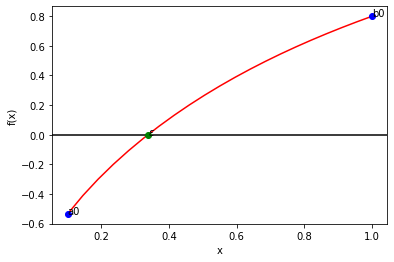

iter 8
a 0.335546875
b 0.33906250000000004
xk: 0.33730468750000003
fxk -0.0002982299993343762
dif 0.003515625000000022 

Posição Falsa -----------


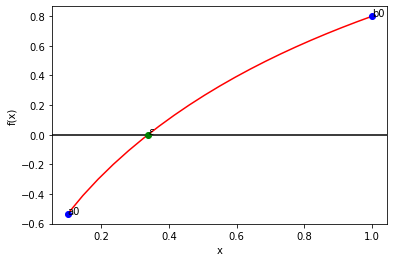

iter 4
a0: 0.1 , b0:  1
a: 0.1 , b:  0.33767226791219523
xk: 0.33767226791219523
fxk 0.0003618008606688372
dif 0.23846314144870787 



In [17]:
f = lambda x: np.sqrt(x)-5**(-x)
E = 0.001
CallBiseccao(a,b,f,E)
CallfalsePosition(a,b,f,E)

#### c) com $\epsilon = 0.01$
$$f(x) = x^5 - x^4 - 4x + 1$$

Bisecção -----------


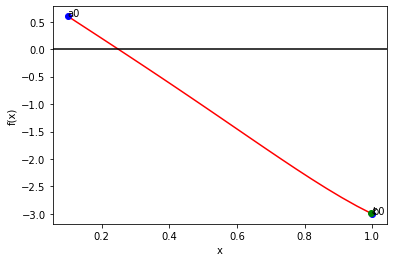

iter 7
a 0.99296875
b 1
xk: 0.996484375
fxk -2.98940394662365
dif 0.007031250000000044 

Posição Falsa -----------


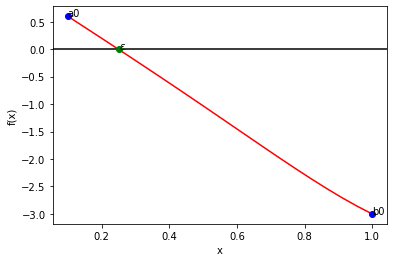

iter 0
a0: 0.1 , b0:  1
a: 0.2499812495312383 , b:  1
xk: 0.2499812495312383
fxk -0.0028538800176542978
dif 0.9 



In [18]:
f = lambda x: x**5-x**4-4*x +1
E = 0.01
CallBiseccao(a,b,f,E)
CallfalsePosition(a,b,f,E)

#### d) com $\epsilon = 0.005$

$$f(x) = 0.05x^3 - 0.4x^2 + 3x\sin x = 0$$

Bisecção -----------


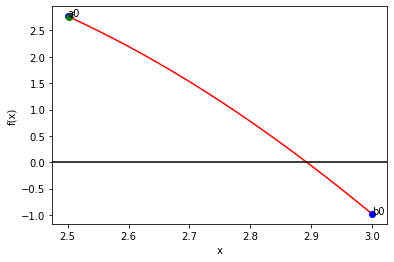

iter 7
a 2.5
b 2.50390625
xk: 2.501953125
fxk 2.759469232218329
dif 0.00390625 

Posição Falsa -----------


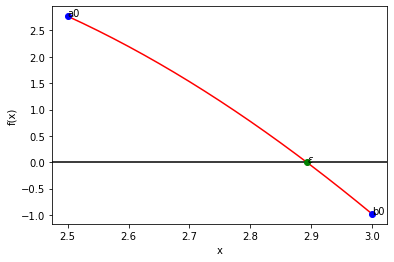

iter 2
a0: 2.5 , b0:  3
a: 2.898496738920558 , b:  2.8927376884937304
xk: 2.8927376884937304
fxk 0.000533905742414742
dif 0.029162798959263547 



In [19]:
f = lambda x: 0.05*x**3 - 0.4*x**2 + 3*x*np.sin(x)
E = 0.005
CallBiseccao(2.5,3,f,E)
CallfalsePosition(2.5,3,f,E)